<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Heatmap</a></span><ul class="toc-item"><li><span><a href="#Scheme" data-toc-modified-id="Scheme-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Scheme</a></span></li><li><span><a href="#Regime-A,-B-and-C" data-toc-modified-id="Regime-A,-B-and-C-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Regime A, B and C</a></span></li><li><span><a href="#Engineered-$\mathbf{B}$" data-toc-modified-id="Engineered-$\mathbf{B}$-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Engineered $\mathbf{B}$</a></span></li><li><span><a href="#size-100-and-size-1000" data-toc-modified-id="size-100-and-size-1000-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>size 100 and size 1000</a></span></li></ul></li><li><span><a href="#Community-Properties" data-toc-modified-id="Community-Properties-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Community Properties</a></span><ul class="toc-item"><li><span><a href="#Gaussian-Noise" data-toc-modified-id="Gaussian-Noise-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gaussian Noise</a></span></li><li><span><a href="#Uniform-Sampling" data-toc-modified-id="Uniform-Sampling-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Uniform Sampling</a></span></li><li><span><a href="#Binary-Sampling" data-toc-modified-id="Binary-Sampling-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Binary Sampling</a></span></li></ul></li><li><span><a href="#Linear-Response-Functions" data-toc-modified-id="Linear-Response-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear Response Functions</a></span><ul class="toc-item"><li><span><a href="#Gausian-Noise" data-toc-modified-id="Gausian-Noise-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gausian Noise</a></span></li><li><span><a href="#Uniform-Noise" data-toc-modified-id="Uniform-Noise-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Uniform Noise</a></span></li><li><span><a href="#Other-Structures" data-toc-modified-id="Other-Structures-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Other Structures</a></span></li></ul></li><li><span><a href="#Other-dynamics" data-toc-modified-id="Other-dynamics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Other dynamics</a></span><ul class="toc-item"><li><span><a href="#Linear-resource-dynamics" data-toc-modified-id="Linear-resource-dynamics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear-resource dynamics</a></span></li><li><span><a href="#Crossfeeding" data-toc-modified-id="Crossfeeding-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Crossfeeding</a></span></li></ul></li><li><span><a href="#Minium-eigenvalue" data-toc-modified-id="Minium-eigenvalue-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Minium eigenvalue</a></span><ul class="toc-item"><li><span><a href="#Gaussian" data-toc-modified-id="Gaussian-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Gaussian</a></span></li><li><span><a href="#Uniform" data-toc-modified-id="Uniform-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Uniform</a></span></li><li><span><a href="#Other-strucutures" data-toc-modified-id="Other-strucutures-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Other strucutures</a></span></li></ul></li><li><span><a href="#Extinction-Threshold" data-toc-modified-id="Extinction-Threshold-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extinction Threshold</a></span><ul class="toc-item"><li><span><a href="#Quadratoc" data-toc-modified-id="Quadratoc-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Quadratoc</a></span></li><li><span><a href="#Linear" data-toc-modified-id="Linear-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Linear</a></span></li><li><span><a href="#Crossfeeding" data-toc-modified-id="Crossfeeding-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Crossfeeding</a></span></li></ul></li><li><span><a href="#Spectrum" data-toc-modified-id="Spectrum-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Spectrum</a></span></li></ul></div>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import time
import pandas as pd
import matplotlib
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import pdb
import os.path
import pickle
from scipy.integrate import odeint
from scipy.signal import savgol_filter
import seaborn as sns
def color20():
# These are the "Tableau 20" colors as RGB.
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
    for i in range(len(tableau20)):
           r, g, b = tableau20[i]
           tableau20[i] = (r / 255., g / 255., b / 255.)
    return tableau20
sns.set(style="white")
tableau20 = color20()  # initial colors for plot;

##  Heatmap

### Scheme

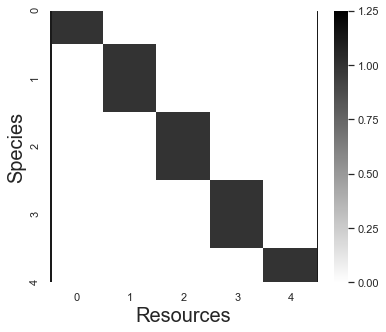

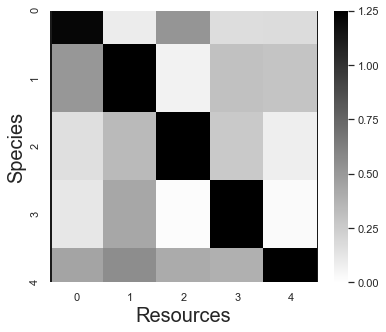

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
f, ax = plt.subplots()
c = np.eye(5)
ax = sns.heatmap(c,vmax=1.25, vmin=0, cmap='gray_r')
ax.set_xlabel('Resources',fontsize=20)
ax.set_ylabel('Species',fontsize=20)
ax.axhline(y=0, color='k',linewidth=3)
ax.axhline(y=5, color='k',linewidth=3)
ax.axvline(x=0, color='k',linewidth=3)
ax.axvline(x=5, color='k',linewidth=3)
fig_name='scheme_heatmap1'+'.pdf'
f.set_size_inches(6, 5)
f.savefig(fig_name, dpi=300,bbox_inches='tight',transparent='True')

f, ax = plt.subplots()
c = np.eye(5)+1.5/np.sqrt(5)*np.random.random((5, 5))

ax=sns.heatmap(c,vmax=1.25, vmin=0, cmap='gray_r')
ax.set_xlabel('Resources',fontsize=20)
ax.set_ylabel('Species',fontsize=20)
ax.axhline(y=0, color='k',linewidth=3)
ax.axhline(y=5, color='k',linewidth=3)
ax.axvline(x=0, color='k',linewidth=3)
ax.axvline(x=5, color='k',linewidth=3)
fig_name='scheme_heatmap2'+'.pdf'
f.set_size_inches(6, 5)
f.savefig(fig_name, dpi=300,bbox_inches='tight',transparent='True')

### Regime A, B and C

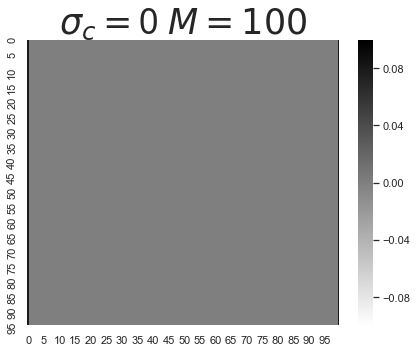

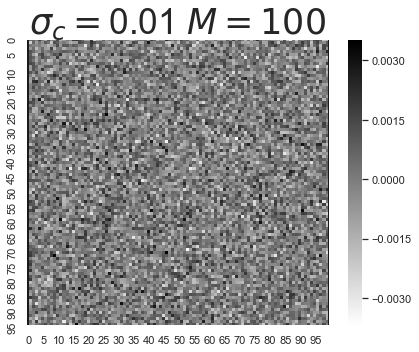

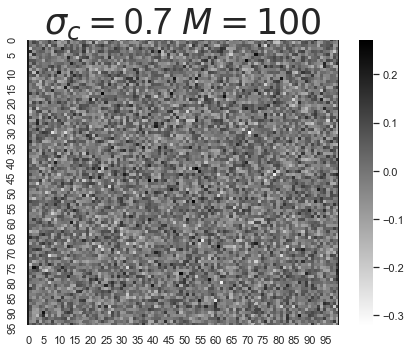

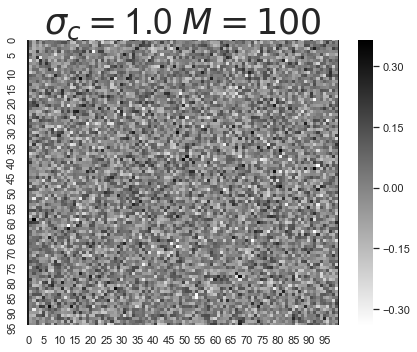

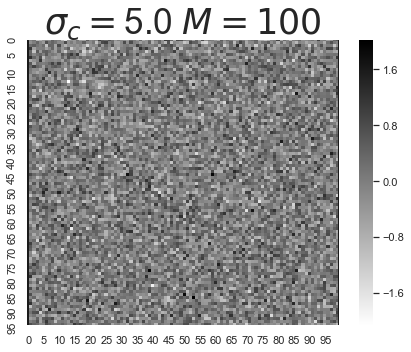

In [3]:
Sig=[0, 0.01, 0.7, 1., 5.]
Size=[100]
name_list=['A','B','C' ]
type_list=['Identity','Circulant','Block' ]
h=0;
for i in range(1):
    for j in range(5):
        i=3
        sigc=Sig[j];
        M=Size[0]
        if i==0:
            C=np.eye(M)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==1:
            C=circ(M, 7)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==2:
            C=block(10, 10)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==3:
            C=sigc/np.sqrt(M)*np.random.randn(M,M)
        fig, ax = plt.subplots()
        fig.set_size_inches(6, 5)
        ax=sns.heatmap(C, cbar=True, cmap='gray_r')
        ax.axhline(y=0, color='k',linewidth=3)
        ax.axhline(y=100, color='k',linewidth=3)
        ax.axvline(x=0, color='k',linewidth=3)
        ax.axvline(x=100, color='k',linewidth=3)
        ax.set_title('$\sigma_c=$'+str(sigc)+' $M=100$',fontsize=35)
        type_list
        fig.tight_layout()
        fig_name='Fig3_heatmap'+str(i)+str(j)+'.pdf'
        fig.savefig(fig_name, dpi=300, transparent=True)
        plt.show()

### Engineered $\mathbf{B}$

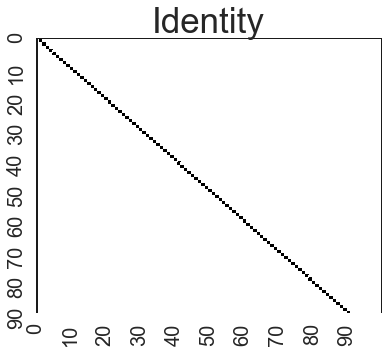

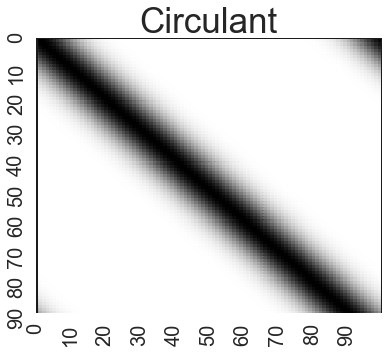

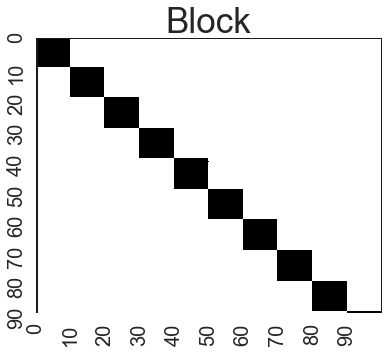

In [4]:
import math as mt
from scipy.linalg import block_diag
Sig=[0, 0.01, 0.7, 1., 5.]
Size=[100]
name_list=['A','B','C' ]
type_list=['Identity','Circulant','Block' ]
h=0;
def block(n, m): # m: block size n: number of blocks
    a = np.full((m, m), 1)
    C = block_diag(*([a] * n))
    return C
def circ(n, r):
    C_type = 'gaussian2'
    cc = np.array([])
    for i in np.arange(n):

        if C_type == 'gaussian2':
            cc = np.append(cc, (mt.exp(-min(i, abs(n-i))**2 / (2 * r**2))))

    C = cc
    for i in np.arange(n-1):
        cc = np.append(cc[-1:], cc[:-1])
        C  = np.vstack((C, cc))
    return C
for i in range(3):
    for j in range(1):
        j=0
        sigc=Sig[j];
        M=Size[0]
        if i==0:
            C=np.eye(M)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==1:
            C=circ(M, 7)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==2:
            C=block(10, 10)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==3:
            C=sigc/np.sqrt(M)*np.random.randn(M,M)
        #fig, (cax, ax) = plt.subplots(nrows=2, figsize=(6,6),  gridspec_kw={"height_ratios":[0.05, 1]})
        fig, ax = plt.subplots()
        fig.set_size_inches(5.5, 5)
        ax=sns.heatmap(C, cmap='gray_r',cbar=False)
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end ,10))
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
        start, end = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(end, start ,10))
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
        ax.xaxis.set_tick_params(labelsize=20)
        ax.yaxis.set_tick_params(labelsize=20)
        ax.axhline(y=0, color='k',linewidth=3)
        ax.axhline(y=100, color='k',linewidth=3)
        ax.axvline(x=0, color='k',linewidth=3)
        ax.axvline(x=100, color='k',linewidth=3)
        #fig.colorbar(ax.get_children()[0], cax=cax, orientation="horizontal")
        #ax.set_title('$\sigma_c=$'+str(sigc)+' $M=100$',fontsize=35)
        ax.set_title(type_list[i],fontsize=35)
        type_list
        fig.tight_layout()
        fig_name='Fig3_heatmap'+str(i)+str(j)+'.pdf'
        fig.savefig(fig_name, dpi=300, transparent=True)
        plt.show()

### size 100 and size 1000

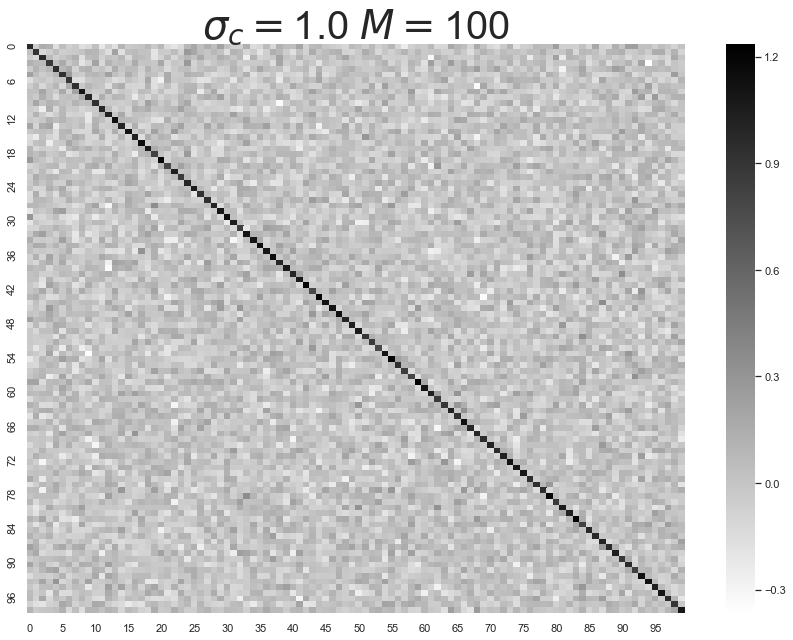

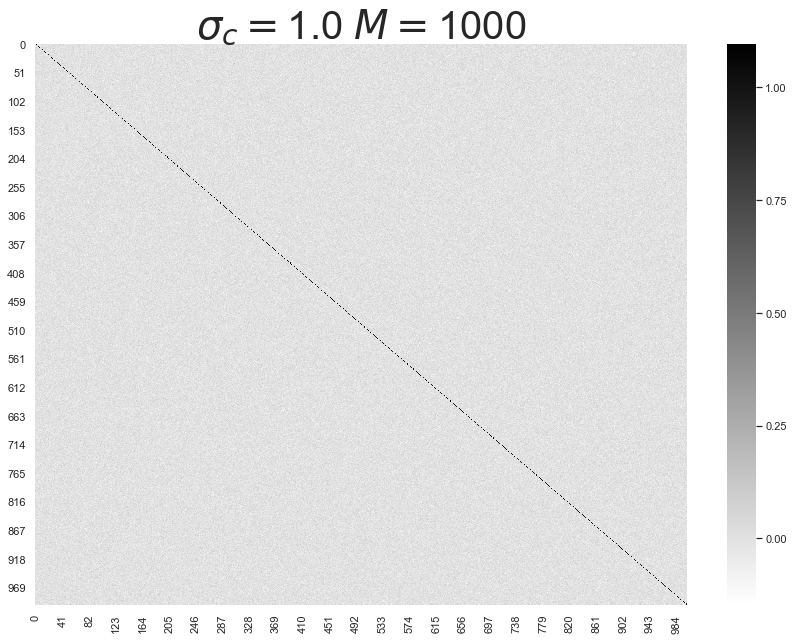

In [5]:
Sig=[1.]
Size=[100, 1000]
name_list=['Identity','Circulant','Block']
h=0
for j in range(2):
    for i in range(1):
        sigc=Sig[0];
        M=Size[j]
        fig,ax = plt.subplots()
        if i==0:
            C=np.eye(M)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==1:
            C=circ(M, 7)+sigc/np.sqrt(M)*np.random.randn(M,M)
        if i==2:
            C=block(int(M/10), 10)+sigc/np.sqrt(M)*np.random.randn(M,M)
        ax=sns.heatmap(C, cbar=True, cmap='gray_r')
        ax.set_title('$\sigma_c=$'+str(sigc)+' $M=$'+str(M),fontsize=40) 
        fig.set_size_inches(12, 9)
        fig.tight_layout()
        fig_name='heatmap_M'+str(M)+'.tiff'
        fig.savefig(fig_name, dpi=500, transparent=True)
        plt.show()

## Community Properties
### Gaussian Noise

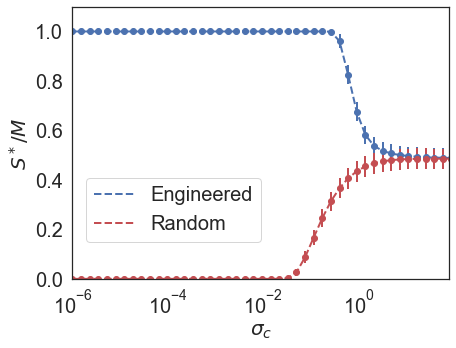

In [299]:
Identity = pd.read_csv('Data/Community_gaussian_identity_quadratic_CVXOPT_log_v2.csv')
Null = pd.read_csv('Data/Community_gaussian_null_quadratic_CVXOPT_log_v2.csv')
Block = pd.read_csv('Data/Community_gaussian_block_quadratic_CVXOPT_log_v2.csv')
Circulant = pd.read_csv('Data/Community_gaussian_circulant_quadratic_CVXOPT_log_v2.csv')
Data=[Identity, Null]
Legend = ["Engineered", "Random"]
color=['b','r']
fig, ax = plt.subplots()
for i in range(1):
    ax.set_xlim([10**(-6), 10**(1.9)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for j in range(2):
        data=Data[j]
        data =data[data['mu'] == 0.0] 
        data =data[data['K'] == 1.0] 
        indices=np.arange(0,len(data['epsilon']),4)
        if i==0:
            indices=np.arange(0,len(data['epsilon']),6)
            ax.plot(data['epsilon'][indices],data['phi_N'][indices],linestyle='dashed', label=Legend[j],c=color[j],linewidth=2)
            ax.errorbar(data['epsilon'][indices], data['phi_N'][indices], yerr=data['phi_N_bar'][indices], fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            #ax.scatter(data['epsilon'][indices], data['phi_N'][indices], label='_nolegend_', s=15,c=color[j])
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.10, 0.6, 0.6),prop={'size':20})
        if i==1:
            ax.plot(data['epsilon'],data['mean_N_s'],linestyle='dashed', alpha=0.7, label=Legend[j],c='tableau20[color[j]]')
            ax.scatter(data['epsilon'], data['mean_N_s'], alpha=0.7, label='_nolegend_', s=15,c=tableau20[color[j]])
            ax.set_ylim([0, 3.0])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'],data['q_N_s'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['q_N_s'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0,1.6])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(6.5,5)
fig.tight_layout()
fig_name='community_properties.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

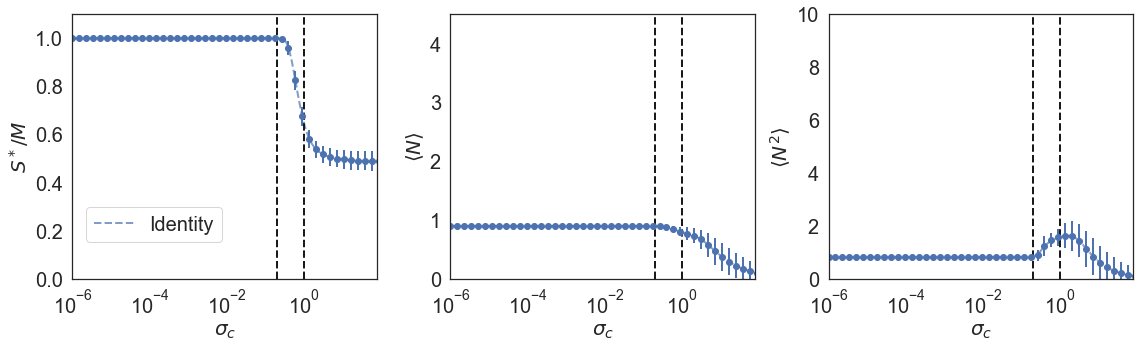

In [382]:
Identity = pd.read_csv('Data/Community_gaussian_identity_quadratic_CVXOPT_log_v2.csv')
Null = pd.read_csv('Data/Community_gaussian_null_quadratic_CVXOPT_log_v2.csv')
Block = pd.read_csv('Data/Community_gaussian_block_quadratic_CVXOPT_log_v2.csv')
Circulant = pd.read_csv('Data/Community_gaussian_circulant_quadratic_CVXOPT_log_v2.csv')
Data=[Identity,Circulant, Block, Null]
Legend = ["Identity", "Circulant", "Block", "Random"]
color=['b','orange','g','r']
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 10**(1.9)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for j in range(1):
        data=Data[j]
        data =data[data['mu'] == 0.0] 
        data =data[data['K'] == 1.0] 
        indices=np.arange(0,len(data['epsilon']),6)
        if i==0:
            ax.plot(data['epsilon'],data['phi_N'],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['phi_N'][indices], yerr=data['phi_N_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.10, 0.6, 0.6),prop={'size':20})
        if i==1:
            ax.plot(data['epsilon'][indices],data['mean_N'][indices],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['mean_N'][indices], yerr=data['mean_N_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0, 4.5])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'][indices],data['q_N'][indices],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['q_N'][indices], yerr=data['q_N_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0,10.])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        ax.axvline(x=1.0, linewidth=2, color='k', linestyle='dashed')
        ax.axvline(x=0.2, linewidth=2, color='k', linestyle='dashed')
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_quadratic_gaussian.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

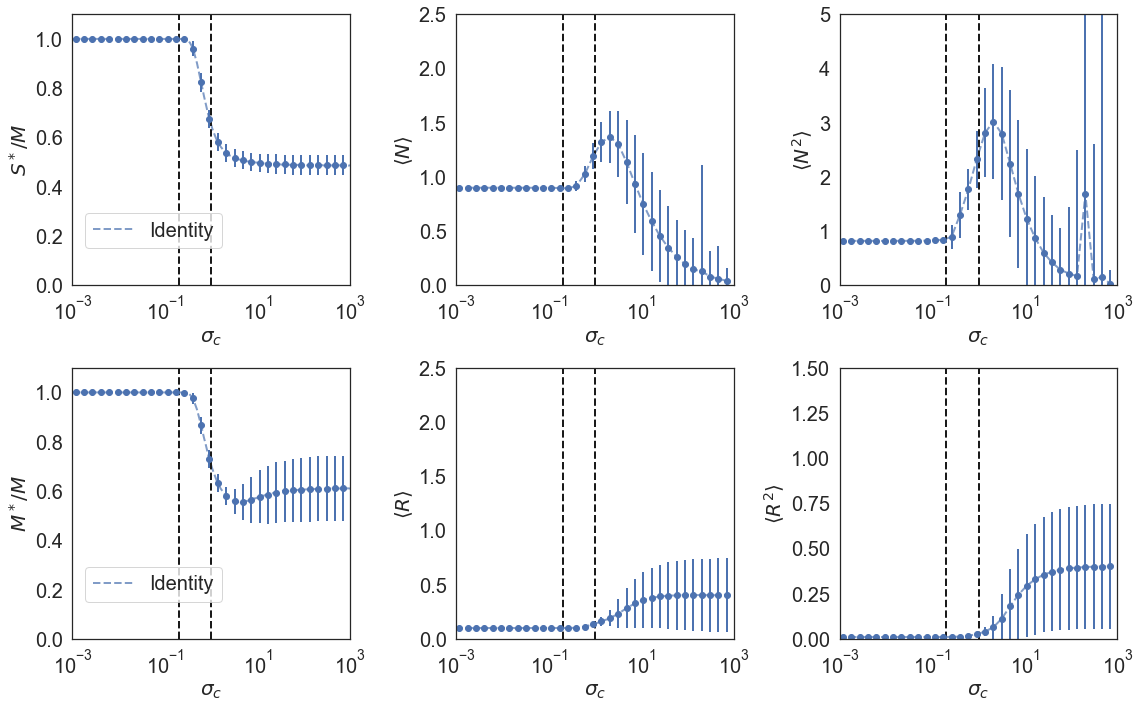

In [395]:
Identity = pd.read_csv('Data/Community_gaussian_identity_quadratic_CVXOPT_log_v2.csv')
Null = pd.read_csv('Data/Community_gaussian_null_quadratic_CVXOPT_log_v2.csv')
Block = pd.read_csv('Data/Community_gaussian_block_quadratic_CVXOPT_log_v2.csv')
Circulant = pd.read_csv('Data/Community_gaussian_circulant_quadratic_CVXOPT_log_v2.csv')
Data=[Identity,Circulant, Block, Null]
Legend = ["Identity", "Circulant", "Block", "Random"]
color=['b','orange','g','r']
fig, axs = plt.subplots(2, 3)
axs = axs.ravel()
for i in range(6):
    ax =axs[i]
    ax.set_xlim([10**(-3), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for j in range(1):
        data=Data[j]
        data =data[data['mu'] == 0.0] 
        data =data[data['K'] == 1.0] 
        indices=np.arange(0,len(data['epsilon']),6)
        if i==0:
            ax.plot(data['epsilon'],data['phi_N'],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['phi_N'][indices], yerr=data['phi_N_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.10, 0.6, 0.6),prop={'size':20})
        if i==1:
            ax.plot(data['epsilon'][indices],data['mean_N_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['mean_N_s'][indices], yerr=data['mean_N_s_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0, 2.5])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'][indices],data['q_N_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['q_N_s'][indices], yerr=data['q_N_s_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0,5.])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6
        if i==3:
            ax.plot(data['epsilon'],data['phi_R'],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['phi_R'][indices], yerr=data['phi_R_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$M^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.10, 0.6, 0.6),prop={'size':20})
        if i==4:
            ax.plot(data['epsilon'][indices],data['mean_R_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['mean_R_s'][indices], yerr=data['mean_R_s_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0, 2.5])
            ax.set_ylabel(r'$\left<R\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==5:
            ax.plot(data['epsilon'][indices],data['q_R_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['q_R_s'][indices], yerr=data['q_R_s_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0,1.5])
            ax.set_ylabel(r'$\left<R^2\right>$',fontsize=20)
        
        ax.axvline(x=1.0, linewidth=2, color='k', linestyle='dashed')
        ax.axvline(x=0.2, linewidth=2, color='k', linestyle='dashed')
fig.set_size_inches(16, 10)
fig.tight_layout()
fig_name='community_properties_quadratic_gaussian.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

### Uniform Sampling

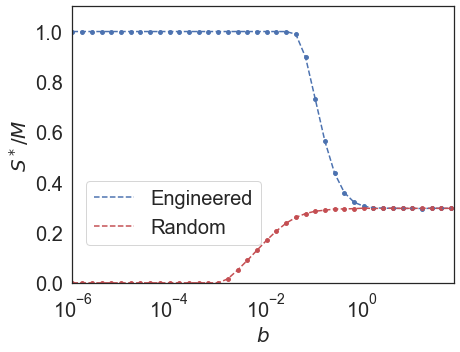

In [31]:
Identity = pd.read_csv('Data/Community_uniform_identity_quadratic_CVXOPT_log_v1.csv')
Null = pd.read_csv('Data/Community_uniform_null_quadratic_CVXOPT_log_v1.csv')
Data=[Identity, Null]
Legend = ["Engineered", "Random"]
color=['b','r']
fig, ax = plt.subplots()
for i in range(1):
    ax.set_xlim([10**(-6), 10**(1.9)])
    ax.set_xlabel(r'$b$',fontsize=20)
    ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for j in range(2):
        data=Data[j]
        data =data[data['mu'] == 1.0] 
        data =data[data['K'] == 1.0] 
        indices=np.arange(0,len(data['epsilon']),4)
        if i==0:
            ax.plot(data['epsilon'][indices],data['phi_N'][indices],linestyle='dashed', label=Legend[j],c=color[j])
            ax.scatter(data['epsilon'][indices], data['phi_N'][indices], label='_nolegend_', s=15,c=color[j])
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.10, 0.6, 0.6),prop={'size':20})
        if i==1:
            ax.plot(data['epsilon'],data['mean_N_s'],linestyle='dashed', alpha=0.7, label=Legend[j],c='tableau20[color[j]]')
            ax.scatter(data['epsilon'], data['mean_N_s'], alpha=0.7, label='_nolegend_', s=15,c=tableau20[color[j]])
            ax.set_ylim([0, 3.0])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'],data['q_N_s'],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'], data['q_N_s'], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0,1.6])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(6.5,5)
fig.tight_layout()
fig_name='community_properties_uniform.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

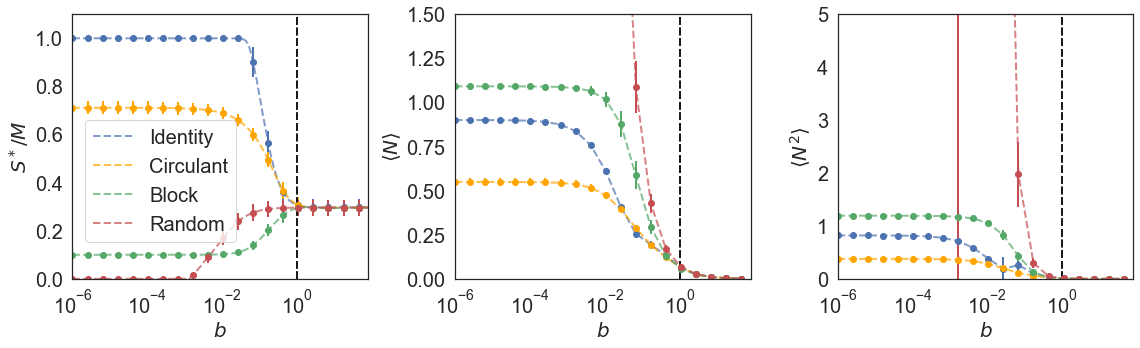

In [375]:
Identity = pd.read_csv('Data/Community_uniform_identity_quadratic_CVXOPT_log_v2.csv')
Null = pd.read_csv('Data/Community_uniform_null_quadratic_CVXOPT_log_v2.csv')
Block = pd.read_csv('Data/Community_uniform_block_quadratic_CVXOPT_log_v2.csv')
Circulant = pd.read_csv('Data/Community_uniform_circulant_quadratic_CVXOPT_log_v2.csv')
Data=[Identity,Circulant, Block, Null]
Legend = ["Identity", "Circulant", "Block", "Random"]
color=['b','orange','g','r']
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 10**(1.9)])
    ax.set_xlabel(r'$b$',fontsize=20)
    ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for j in range(4):
        data=Data[j]
        data =data[data['mu'] == 0.0] 
        data =data[data['K'] == 1.0] 
        indices=np.arange(0,len(data['epsilon']),8)
        if i==0:
            ax.plot(data['epsilon'],data['phi_N'],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['phi_N'][indices], yerr=data['phi_N_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.10, 0.6, 0.6),prop={'size':20})
        if i==1:
            ax.plot(data['epsilon'][indices],data['mean_N_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['mean_N_s'][indices], yerr=data['mean_N_s_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0, 1.5])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'][indices],data['q_N_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['q_N_s'][indices], yerr=data['q_N_s_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0,5.])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_quadratic_uniform.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

### Binary Sampling

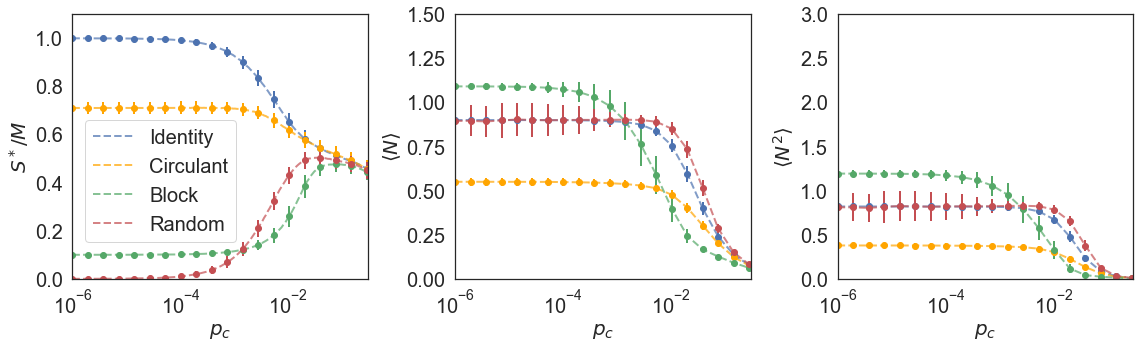

In [134]:
Identity = pd.read_csv('Data/Community_binomial_identity_quadratic_CVXOPT_log_v2.csv')
Null = pd.read_csv('Data/Community_binomial_null_quadratic_CVXOPT_log_v2.csv')
Block = pd.read_csv('Data/Community_binomial_block_quadratic_CVXOPT_log_v2.csv')
Circulant = pd.read_csv('Data/Community_binomial_circulant_quadratic_CVXOPT_log_v2.csv')
Data=[Identity,Circulant, Block, Null]
Legend = ["Identity", "Circulant", "Block", "Random"]
color=['b','orange','g','r']
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 0.3])
    ax.set_xlabel(r'$p_c$',fontsize=20)
    ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for j in range(4):
        data=Data[j]
        data =data[data['mu'] == 0.0] 
        data =data[data['K'] == 1.0] 
        indices=np.arange(0,len(data['epsilon']),8)
        if i==0:
            ax.plot(data['epsilon'],data['phi_N'],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['phi_N'][indices], yerr=data['phi_N_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.10, 0.6, 0.6),prop={'size':20})
        if i==1:
            ax.plot(data['epsilon'][indices],data['mean_N_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['mean_N_s'][indices], yerr=data['mean_N_s_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0, 1.5])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'][indices],data['q_N_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j],linewidth=2,c=color[j])
            ax.errorbar(data['epsilon'][indices], data['q_N_s'][indices], yerr=data['q_N_s_bar'][indices], label='_nolegend_', fmt='o',ecolor=color[j],c=color[j],linewidth=2)
            ax.set_ylim([0,3.])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_quadratic_binary.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

## Linear Response Functions
### Gausian Noise

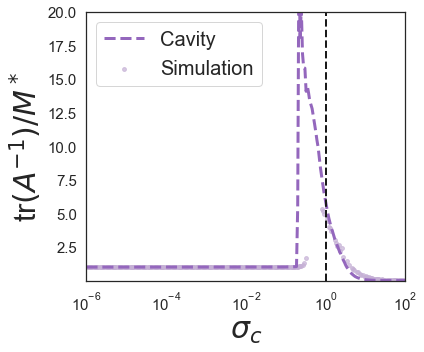

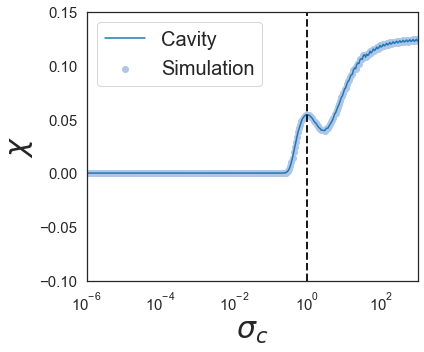

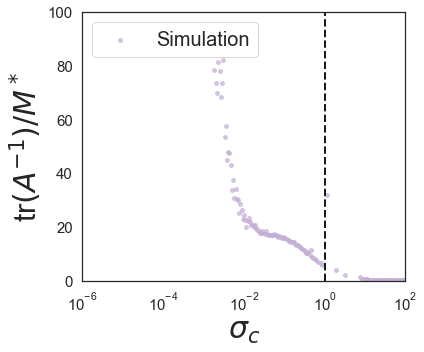

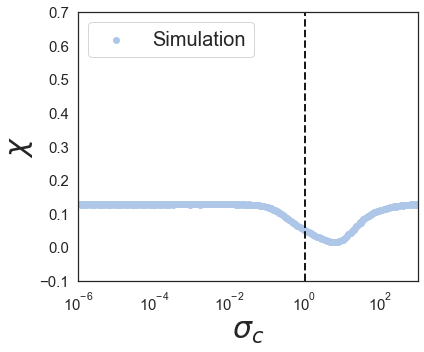

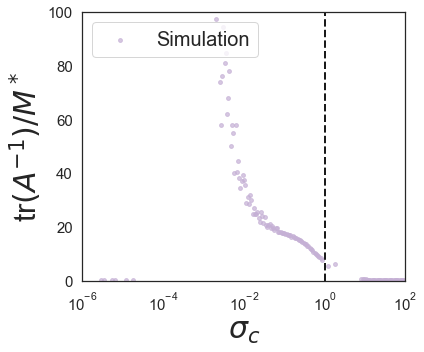

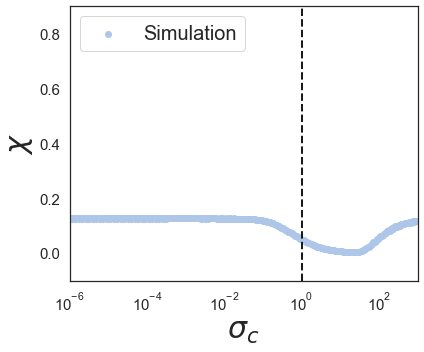

In [45]:
Identity = pd.read_csv('Data/Community_gaussian_identity_quadratic_CVXOPT_log_v2.csv')
Null = pd.read_csv('Data/Community_gaussian_null_quadratic_CVXOPT_log_v2.csv')
Block = pd.read_csv('Data/Community_gaussian_block_quadratic_CVXOPT_log_v2.csv')
Circulant = pd.read_csv('Data/Community_gaussian_circulant_quadratic_CVXOPT_log_v2.csv')
Datas=[Identity, Circulant,Block, Null ]
Legend = ["Identity", "Circulant", "Block", "Random"]
for j in range(3):
    Data=Datas[j]
    Data=Data[Data['mu']==0.]
    Data=Data[Data['K']==1.]
    T=np.asarray(Data['epsilon'])
    phi_N=np.asarray(Data['phi_N'])
    phi_R=np.asarray(Data['phi_R'])
    Chi=np.zeros(len(T))
    Nu=np.zeros(len(T))
    i=0
    if j==0:
        for t in T:
            Chi[i]=phi_R[i]-phi_N[i]
            if Chi[i]==0:
                Nu[i]=-phi_N[i]/(phi_N[i]*t**2-1)
            else:
                Nu[i]=(((2.*phi_N[i]-phi_R[i])-1./t**2)+np.sqrt(1/t**4+phi_R[i]*(2./t**2-4./t**2*phi_N[i]+phi_R[i])))/(2*(phi_R[i]-phi_N[i])*t**2)
            i=i+1
    i=1
    fig, ax = plt.subplots(1,1,figsize=(6,5))
    c=8
    #-------------------------------------------------------------
    # plot nu, the response function for growth rate perturbations
    #-------------------------------------------------------------
    indices=np.arange(0,len(Data['epsilon']),4)
    if j==0:
        ax.plot(T, Nu,color=tableau20[c],label='Cavity', linewidth=3,linestyle='dashed')
    ax.scatter(Data['epsilon'], -Data['nu'],s=15,color=tableau20[c+1],alpha=0.7,label='Simulation')
    #ax.errorbar(Data['epsilon'][indices], -Data['nu_threshold'][indices], yerr=Data['std_nu_threshold'][indices], fmt='o',ecolor=tableau20[c+1],c=tableau20[c+1],linewidth=2,label='Simulation',alpha=0.7)
    ax.axvline(x=1.0, linewidth=2, color='k', linestyle='dashed')
    ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    if j==0: ax.set_ylim([1e-6,20])
    #ax.set_yscale('log')
    if j>0: ax.set_ylim([-0.1,1e2])

    ax.set_xlim([10**(-6), 10**(2)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=30)
    ax.set_ylabel(r'tr$({A}^{-1})/M^*$',fontsize=30)
    ax.legend(loc='upper left',fontsize=20)
    fig.tight_layout()
    fig_name='linear_response1_'+Legend[j]+'.pdf'
    fig.savefig(fig_name, dpi=300, transparent=True)
    #-------------------------------------------------------------
    # plot chi, the response function for environemnt supplies perturbations
    #-------------------------------------------------------------
    fig, ax = plt.subplots(1,1,figsize=(6,5))
    c=0;
    if j==0:
        ax.plot(T, Chi,color=tableau20[c],label='Cavity')
    ax.scatter(Data['epsilon'], Data['chi'],color=tableau20[c+1],label='Simulation')
    ax.axvline(x=1.0, linewidth=2, color='k', linestyle='dashed')
    ax.set_ylabel(r'$\chi$',fontsize=30)
    ax.set_xscale('log')
    ax.set_xlim([10**(-6), 10**(3)])
    if j==0: ax.set_ylim([-0.1,0.15])
    if j==1: ax.set_ylim([-0.1,0.7])
    if j==2: ax.set_ylim([-0.1,0.9])
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.set_xlabel(r'$\sigma_c$',fontsize=30)
    ax.legend(loc='upper left',fontsize=20)
    fig_name='linear_response2_'+Legend[j]+'.pdf'
    fig.tight_layout()
    fig.savefig(fig_name, dpi=300, transparent=True)

### Uniform Noise

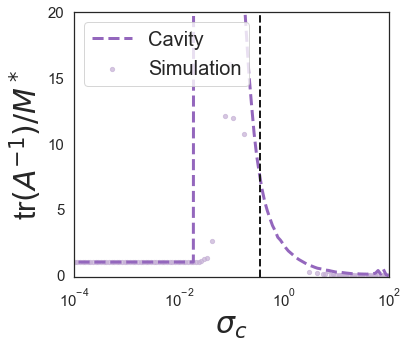

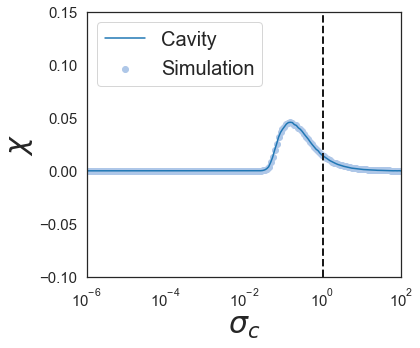

In [397]:
Identity = pd.read_csv('Data/Community_uniform_identity_quadratic_CVXOPT_log_v2.csv')
Datas=[Identity]
Legend = ["Identity", "Circulant", "Block", "Random"]
for j in range(1):
    Data=Datas[j]
    Data=Data[Data['mu']==0.]
    Data=Data[Data['K']==1.]
    T=np.asarray(Data['epsilon'])*np.sqrt(100/12)
    phi_N=np.asarray(Data['phi_N'])
    phi_R=np.asarray(Data['phi_R'])
    Chi=np.zeros(len(T))
    Nu=np.zeros(len(T))
    i=0
    for t in T:
        Chi[i]=phi_R[i]-phi_N[i]
        if Chi[i]==0:
            Nu[i]=-phi_N[i]/(phi_N[i]*t**2-1)
        else:
            Nu[i]=(((2.*phi_N[i]-phi_R[i])-1./t**2)+np.sqrt(1/t**4+phi_R[i]*(2./t**2-4./t**2*phi_N[i]+phi_R[i])))/(2*(phi_R[i]-phi_N[i])*t**2)
        i=i+1
    fig, ax = plt.subplots(1,1,figsize=(6,5))
    c=8
    #-------------------------------------------------------------
    # plot nu, the response function for growth rate perturbations
    #-------------------------------------------------------------
    ax.plot(T/np.sqrt(100/12), Nu,color=tableau20[c],label='Cavity', linewidth=3,linestyle='dashed')
    ax.scatter(Data['epsilon'], -Data['nu'],s=18,color=tableau20[c+1],alpha=0.7,label='Simulation')
    ax.axvline(x=1.0/np.sqrt(100/12), linewidth=2, color='k', linestyle='dashed')
    ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    if j==0: ax.set_ylim([-0.1,20])
    if j==1: ax.set_ylim([-0.1,0.5])
    if j==2: ax.set_ylim([-0.1,0.9])

    ax.set_xlim([10**(-4), 10**(2)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=30)
    ax.set_ylabel(r'tr$({A}^{-1})/M^*$',fontsize=30)
    ax.legend(loc='upper left',fontsize=20)
    fig.tight_layout()
    fig_name='linear_response1_'+Legend[j]+'.pdf'
    fig.savefig(fig_name, dpi=300, transparent=True)
    #-------------------------------------------------------------
    # plot chi, the response function for environemnt supplies perturbations
    #-------------------------------------------------------------
    fig, ax = plt.subplots(1,1,figsize=(6,5))
    c=0;
    ax.plot(T/np.sqrt(100/12), Chi,color=tableau20[c],label='Cavity')
    ax.scatter(Data['epsilon'], Data['chi'],color=tableau20[c+1],label='Simulation')
    ax.axvline(x=1.0/np.sqrt(100/12), linewidth=2, color='k', linestyle='dashed')
    ax.set_ylabel(r'$\chi$',fontsize=30)
    ax.set_xscale('log')
    ax.set_xlim([10**(-6), 10**(2)])
    if j==0: ax.set_ylim([-0.1,0.15])
    if j==1: ax.set_ylim([-0.1,0.7])
    if j==2: ax.set_ylim([-0.1,0.9])
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.set_xlabel(r'$\sigma_c$',fontsize=30)
    ax.legend(loc='upper left',fontsize=20)
    fig_name='linear_response2_'+Legend[j]+'.pdf'
    fig.tight_layout()
    fig.savefig(fig_name, dpi=300, transparent=True)

### Other Structures

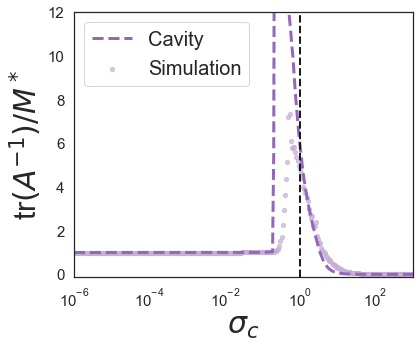

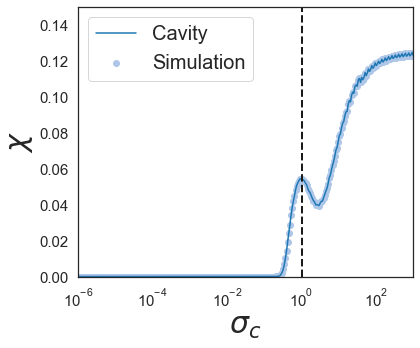

In [313]:
Identity = pd.read_csv('Data/Community_gaussian_identity_quadratic_CVXOPT_log_v2.csv')
Null = pd.read_csv('Data/Community_gaussian_null_quadratic_CVXOPT_log_v2.csv')
Block = pd.read_csv('Data/Community_gaussian_block_quadratic_CVXOPT_log_v2.csv')
Circulant = pd.read_csv('Data/Community_gaussian_circulant_quadratic_CVXOPT_log_v2.csv')
Data=Identity[Identity['mu']==0.]
Data=Identity[Identity['K']==1.]
i=0;
T=np.asarray(Data['epsilon'])
phi_N=np.asarray(Data['phi_N'])
phi_R=np.asarray(Data['phi_R'])
Chi=np.zeros(len(T))
Nu=np.zeros(len(T))
i=0
for t in T:
    Chi[i]=phi_R[i]-phi_N[i]
    if Chi[i]==0:
        Nu[i]=-phi_N[i]/(phi_N[i]*t**2-1)
    else:
        Nu[i]=(((2.*phi_N[i]-phi_R[i])-1./t**2)+np.sqrt(1/t**4+phi_R[i]*(2./t**2-4./t**2*phi_N[i]+phi_R[i])))/(2*(phi_R[i]-phi_N[i])*t**2)
    i=i+1
    
i=1
fig, ax = plt.subplots(1,1,figsize=(6,5))
c=8
#-------------------------------------------------------------
# plot nu, the response function for growth rate perturbations
#-------------------------------------------------------------
ax.plot(T, Nu,color=tableau20[c],label='Cavity', linewidth=3,linestyle='dashed')
ax.scatter(Data['epsilon'], -Data['nu_threshold'],s=18,color=tableau20[c+1],alpha=0.7,label='Simulation')
ax.axvline(x=1.0, linewidth=2, color='k', linestyle='dashed')
ax.set_xscale('log')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylim([-0.1,12])
ax.set_xlim([10**(-6), 10**(3)])
ax.set_xlabel(r'$\sigma_c$',fontsize=30)
ax.set_ylabel(r'tr$({A}^{-1})/M^*$',fontsize=30)
ax.legend(loc='upper left',fontsize=20)
fig.tight_layout()
fig_name='linear_response1.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)
#-------------------------------------------------------------
# plot chi, the response function for environemnt supplies perturbations
#-------------------------------------------------------------
fig, ax = plt.subplots(1,1,figsize=(6,5))
c=0;
ax.plot(T, Chi,color=tableau20[c],label='Cavity')
ax.scatter(Data['epsilon'], Data['chi'],color=tableau20[c+1],label='Simulation')
ax.axvline(x=1.0, linewidth=2, color='k', linestyle='dashed')
ax.set_ylabel(r'$\chi$',fontsize=30)
ax.set_xscale('log')
ax.set_xlim([10**(-6), 10**(3)])
ax.set_ylim([0,0.15])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$\sigma_c$',fontsize=30)
ax.legend(loc='upper left',fontsize=20)
fig_name='linear_response2.pdf'
fig.tight_layout()
fig.savefig(fig_name, dpi=300, transparent=True)

## Other dynamics
### Linear-resource dynamics

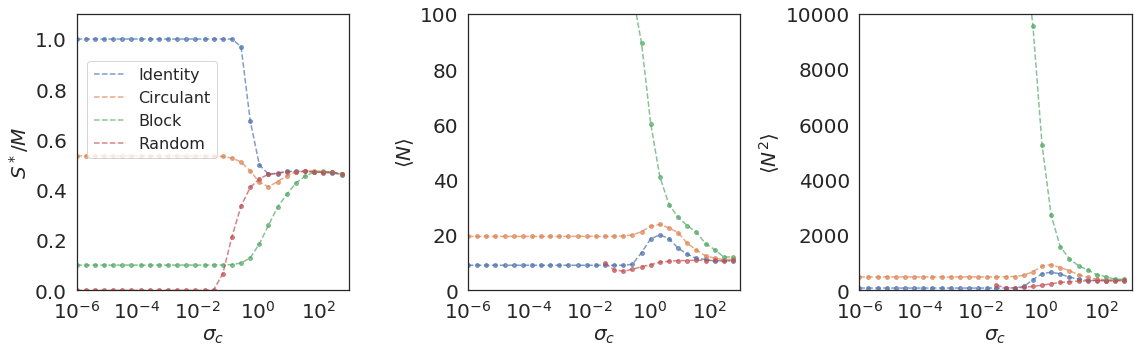

In [3]:
Identity = pd.read_csv('Data/Community_gaussian_identity_linear_CVXOPT_log_v3.csv')
Null = pd.read_csv('Data/Community_gaussian_null_linear_CVXOPT_log_v3.csv')
Block = pd.read_csv('Data/Community_gaussian_block_linear_CVXOPT_log_v3.csv')
Circulant = pd.read_csv('Data/Community_gaussian_circulant_linear_CVXOPT_log_v3.csv')
Data=[Identity,Circulant, Block, Null]
Legend = ["Identity", "Circulant", "Block", "Random"]
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for j in range(4):
        data=Data[j]
        data =data[data['mu'] == 0.0] 
        indices=np.arange(0,len(data['epsilon']),5)
        if i==0:
            ax.plot(data['epsilon'][indices],data['phi_N'][indices],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'][indices], data['phi_N'][indices], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.45, 0.6, 0.6),prop={'size':16})
        if i==1:
            ax.plot(data['epsilon'][indices],data['mean_N_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'][indices], data['mean_N_s'][indices], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 100.1])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'][indices],data['q_N_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'][indices], data['q_N_s'][indices], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0,10000.1])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_linear.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

### Crossfeeding

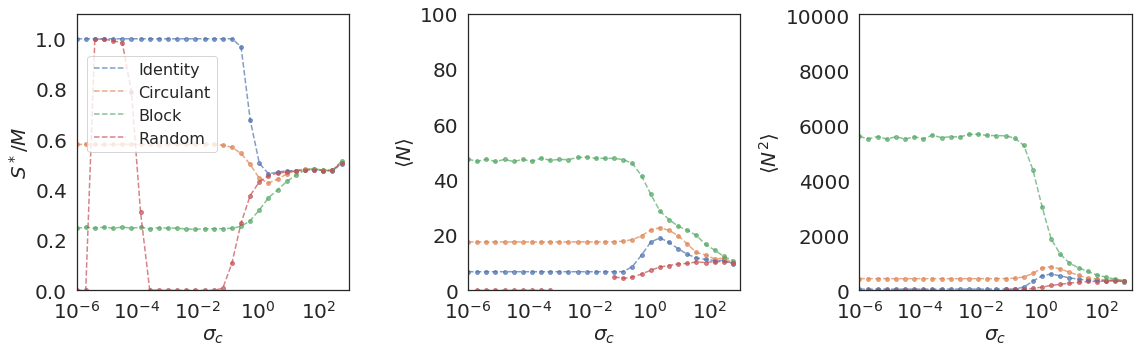

In [5]:
Identity = pd.read_csv('Data/Community_gaussian_identity_crossfeeding_CVXOPT_log_v3.csv')
Null = pd.read_csv('Data/Community_gaussian_null_crossfeeding_CVXOPT_log_v3.csv')
Block = pd.read_csv('Data/Community_gaussian_block_crossfeeding_CVXOPT_log_v3.csv')
Circulant = pd.read_csv('Data/Community_gaussian_circulant_crossfeeding_CVXOPT_log_v3.csv')
Data=[Identity,Circulant, Block, Null]
Legend = ["Identity", "Circulant", "Block", "Random"]
fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
for i in range(3):
    ax =axs[i]
    ax.set_xlim([10**(-6), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for j in range(4):
        data=Data[j]
        data =data[data['mu'] == 0.0] 
        indices=np.arange(0,len(data['epsilon']),5)
        if i==0:
            ax.plot(data['epsilon'][indices],data['phi_N'][indices],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'][indices], data['phi_N'][indices], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 1.1])
            ax.set_ylabel(r'$S^*/M$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.47, 0.6, 0.6),prop={'size':16})
        if i==1:
            ax.plot(data['epsilon'][indices],data['mean_N_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'][indices], data['mean_N_s'][indices], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 100.1])
            ax.set_ylabel(r'$\left<N\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
        if i==2:
            ax.plot(data['epsilon'][indices],data['q_N_s'][indices],linestyle='dashed', alpha=0.7, label=Legend[j])
            ax.scatter(data['epsilon'][indices], data['q_N_s'][indices], alpha=0.7, label='_nolegend_', s=15)
            ax.set_ylim([0, 10065.1])
            ax.set_ylabel(r'$\left<N^2\right>$',fontsize=20)
            #ax.set_title(r'Self-renewing dynamics',fontsize=15)
            #ax.legend(loc='lower left',bbox_to_anchor=(0.01, 0.17, 0.6, 0.6))
fig.set_size_inches(16, 5)
fig.tight_layout()
fig_name='community_properties_crossfeeding.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

## Minium eigenvalue

### Gaussian

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


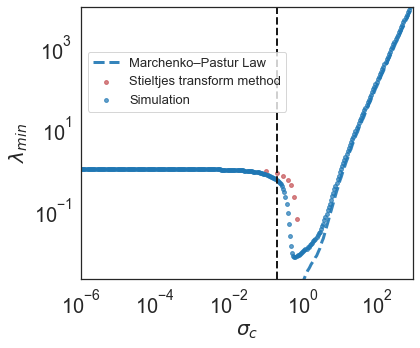

In [402]:
Identity = pd.read_csv('Data/Community_gaussian_identity_quadratic_CVXOPT_log_v2.csv')
Legend = ["Identity", "Circulant", "Block", "Random"]
Legend2 = ["Simulations", "Circulant", "Block", "Random"]
for i in range(1):
    data=Identity
    data =data[data['mu'] == 0.] 
    data =data[data['K'] == 1.] 
    fig, ax = plt.subplots()
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_xlim([10**(-6), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    ax.set_ylim([0.002, 10000.1])
    ax.set_yscale('log')
    ax.set_ylabel(r'$\lambda_{min}$',fontsize=20)
    if i==0:
        ax.axvline(x=0.2, linewidth=2, color='k', linestyle='dashed')
    if i==0:
        ax.scatter([0.1,0.2,0.3,0.4,0.5,0.6,0.7], [0.91, 0.82,0.7, 0.55, 0.4, 0.21,0.06 ], alpha=0.7, label='Stieltjes transform method', s=15,c='r')
    ax.scatter(data['epsilon'], data['lam_min'], alpha=0.7, label='Simulation', s=15,c=tableau20[2*i])
    ax.plot(data['epsilon'],data['epsilon']**2*(1-np.sqrt(data['phi_N']/data['phi_R']))**2,linestyle='dashed', alpha=0.9,linewidth=3, label='Marchenko–Pastur Law',c=tableau20[2*i])
    ax.legend(loc='lower left',bbox_to_anchor=(0.00, 0.59, 0.6, 0.6),prop={'size':13})
    fig.set_size_inches(6, 5)
    fig.tight_layout()
    fig_name='lam_min_gaussian_'+Legend[i]+'.pdf'
    fig.savefig(fig_name, dpi=300, transparent=True)

### Uniform

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


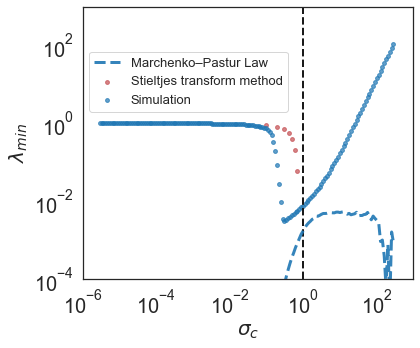

In [399]:
Identity = pd.read_csv('Data/Community_uniform_identity_quadratic_CVXOPT_log_v2.csv')
Legend = ["Identity"]
Legend2 = ["Simulations", "Circulant", "Block", "Random"]
for i in range(1):
    data=Identity
    data =data[data['mu'] == 0.] 
    data =data[data['K'] == 1.] 
    fig, ax = plt.subplots()
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_xlim([10**(-6), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    ax.set_ylim([0.0001, 1000.1])
    ax.set_yscale('log')
    ax.set_ylabel(r'$\lambda_{min}$',fontsize=20)
    if i==0:
        ax.axvline(x=1., linewidth=2, color='k', linestyle='dashed')
    if i==0:
        ax.scatter([0.1,0.2,0.3,0.4,0.5,0.6,0.7], [0.91, 0.82,0.7, 0.55, 0.4, 0.21,0.06 ], alpha=0.7, label='Stieltjes transform method', s=15,c='r')
    ax.scatter(data['epsilon']*np.sqrt(100/12), data['lam_min'], alpha=0.7, label='Simulation', s=15,c=tableau20[2*i])
    ax.plot(data['epsilon']*np.sqrt(100/12),100/12*data['epsilon']**2*(1-np.sqrt(data['phi_N']/data['phi_R']))**2,linestyle='dashed', alpha=0.9,linewidth=3, label='Marchenko–Pastur Law',c=tableau20[2*i])
    ax.legend(loc='lower left',bbox_to_anchor=(0.00, 0.59, 0.6, 0.6),prop={'size':13})
    fig.set_size_inches(6, 5)
    fig.tight_layout()
    fig_name='lam_min_gaussian_'+Legend[i]+'.pdf'
    fig.savefig(fig_name, dpi=300, transparent=True)

### Other strucutures

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


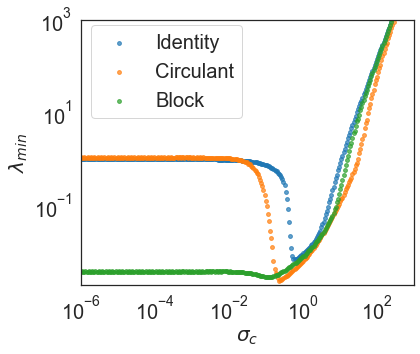

In [330]:
Identity = pd.read_csv('Data/Community_gaussian_identity_quadratic_CVXOPT_log_v2.csv')
Null = pd.read_csv('Data/Community_gaussian_null_quadratic_CVXOPT_log_v2.csv')
Block = pd.read_csv('Data/Community_gaussian_block_quadratic_CVXOPT_log_v2.csv')
Circulant = pd.read_csv('Data/Community_gaussian_circulant_quadratic_CVXOPT_log_v2.csv')
Data=[Identity,Block,Circulant ]
Legend = ["Identity", "Circulant", "Block", "Random"]
Legend2 = ["Simulations", "Circulant", "Block", "Random"]
fig, ax = plt.subplots()
for i in range(3):
    data=Data[i]
    data =data[data['mu'] == 0.] 
    data =data[data['K'] == 1.] 
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_xlim([10**(-6), 10**(3)])
    ax.set_xlabel(r'$\sigma_c$',fontsize=20)
    ax.set_xscale('log')
    ax.set_ylim([0.002, 1000.1])
    ax.set_yscale('log')
    ax.set_ylabel(r'$\lambda_{min}$',fontsize=20)
    ax.scatter(data['epsilon'], data['lam_min'], alpha=0.7, label=Legend[i], s=15,c=tableau20[2*i])
   # ax.plot(data['epsilon'],data['epsilon']**2*(1-np.sqrt(data['phi_N']/data['phi_R']))**2,linestyle='dashed', alpha=0.9,linewidth=3, label='Marchenko–Pastur Law',c=tableau20[2*i])
    ax.legend(loc='lower left',bbox_to_anchor=(0.00, 0.59, 0.6, 0.6),prop={'size':20})
    fig.set_size_inches(6, 5)
    fig.tight_layout()
    fig_name='lam_min_gaussian_network'+'.pdf'
    fig.savefig(fig_name, dpi=300, transparent=True)

## Extinction Threshold
### Quadratoc

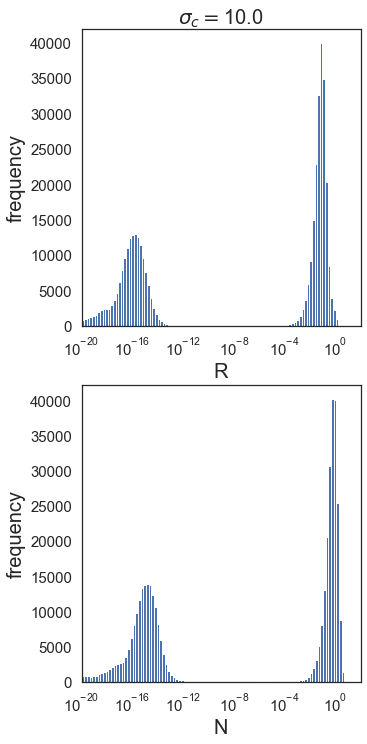

0.9778500235689744


In [16]:
A_type='gaussian'
B_type='circulant'
mu=0.0
sigc=10.
k=1.
filename='Abundance_data/RN_org_'+A_type +'_'+B_type+'_sigc_'+str(sigc)+'_mu_'+str(mu)+'_k_'+str(k) +'.pkl'
n_bins=100
Rs, Ns, lams= pickle.load( open( filename, "rb" ) )
fig, [ax1,ax2] = plt.subplots(2,1,figsize=(5,12))
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
# We can set the number of bins with the `bins` kwarg
ax1.hist(Rs,bins = 10 ** np.linspace(np.log10(1e-20), np.log10(np.amax(Rs)), n_bins))
ax1.set_title("$\sigma_c=$"+str(sigc),fontsize=20)
ax1.set_xscale("log")
ax1.set_xlabel('R',fontsize=20)
ax1.set_ylabel('frequency',fontsize=20)
ax1.set_xlim([1e-20,1e2])

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.hist(Ns,bins = 10 ** np.linspace(np.log10(1e-20), np.log10(np.amax(Ns)), n_bins))
ax2.set_xscale("log")
ax2.set_xlabel('N',fontsize=20)
ax2.set_ylabel('frequency',fontsize=20)
ax2.set_xlim([1e-20,1e2])

plt.show()
fig.tight_layout()
fig_name='Fig_NR_org'+str(sigc)+'.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)
Ns=np.asarray(Ns)
Rs=np.asarray(Rs)
Ns[Ns<1e-6]=0
Rs[Rs<1e-6]=0
print(np.count_nonzero(Ns)/np.count_nonzero(Rs))

### Linear

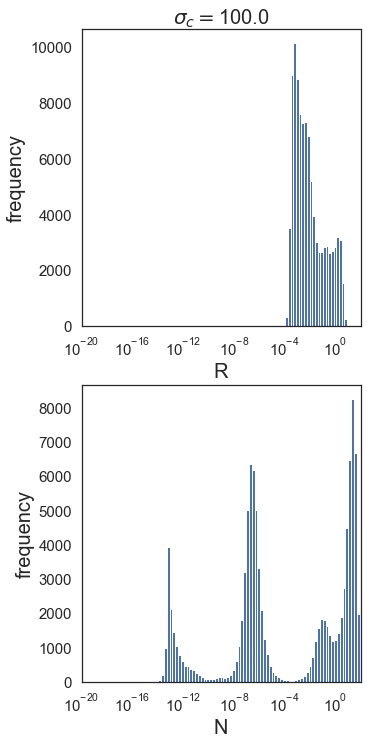

0.54083


In [19]:
A_type='gaussian'
B_type='block'
mu=0.0
sigc=100.
k=1.
filename='Abundance_data/RN_org__linear_'+A_type +'_'+B_type+'_sigc_'+str(sigc)+'_mu_'+str(mu)+'_k_'+str(k) +'.pkl'
n_bins=100
Rs, Ns, lams= pickle.load( open( filename, "rb" ) )
fig, [ax1,ax2] = plt.subplots(2,1,figsize=(5,12))
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
# We can set the number of bins with the `bins` kwarg
ax1.hist(Rs,bins = 10 ** np.linspace(np.log10(1e-20), np.log10(np.amax(Rs)), n_bins))
ax1.set_title("$\sigma_c=$"+str(sigc),fontsize=20)
ax1.set_xscale("log")
ax1.set_xlabel('R',fontsize=20)
ax1.set_ylabel('frequency',fontsize=20)
ax1.set_xlim([1e-20,1e2])

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.hist(Ns,bins = 10 ** np.linspace(np.log10(1e-20), np.log10(np.amax(Ns)), n_bins))
ax2.set_xscale("log")
ax2.set_xlabel('N',fontsize=20)
ax2.set_ylabel('frequency',fontsize=20)
ax2.set_xlim([1e-20,1e2])

plt.show()
fig.tight_layout()
fig_name='Fig_NR_org'+str(sigc)+'.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)
Ns=np.asarray(Ns)
Rs=np.asarray(Rs)
Ns[Ns<1e-6]=0
Rs[Rs<1e-6]=0
print(np.count_nonzero(Ns)/np.count_nonzero(Rs))

### Crossfeeding

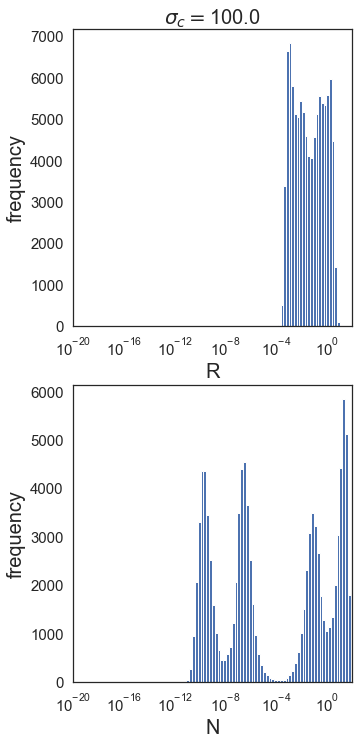

0.52194


In [23]:
A_type='gaussian'
B_type='identity'
mu=0.0
sigc=100.
k=1.
filename='Abundance_data/RN_org__crossfeeding_'+A_type +'_'+B_type+'_sigc_'+str(sigc)+'_mu_'+str(mu)+'_k_'+str(k) +'.pkl'
n_bins=100
Rs, Ns, lams= pickle.load( open( filename, "rb" ) )
fig, [ax1,ax2] = plt.subplots(2,1,figsize=(5,12))
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
# We can set the number of bins with the `bins` kwarg
ax1.hist(Rs,bins = 10 ** np.linspace(np.log10(1e-20), np.log10(np.amax(Rs)), n_bins))
ax1.set_title("$\sigma_c=$"+str(sigc),fontsize=20)
ax1.set_xscale("log")
ax1.set_xlabel('R',fontsize=20)
ax1.set_ylabel('frequency',fontsize=20)
ax1.set_xlim([1e-20,1e2])

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.hist(Ns,bins = 10 ** np.linspace(np.log10(1e-20), np.log10(np.amax(Ns)), n_bins))
ax2.set_xscale("log")
ax2.set_xlabel('N',fontsize=20)
ax2.set_ylabel('frequency',fontsize=20)
ax2.set_xlim([1e-20,1e2])

plt.show()
fig.tight_layout()
fig_name='Fig_NR_org'+str(sigc)+'.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)
Ns=np.asarray(Ns)
Rs=np.asarray(Rs)
Ns[Ns<1e-6]=0
Rs[Rs<1e-6]=0
print(np.count_nonzero(Ns)/np.count_nonzero(Rs))

## Spectrum

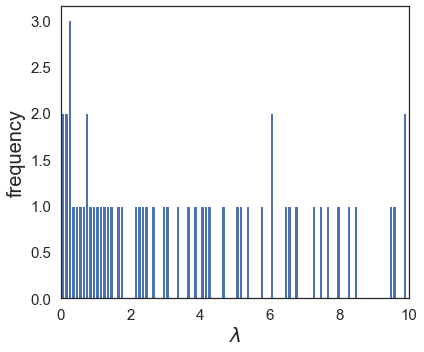

In [18]:
A_type='gaussian'
B_type='identity'
mu=0.0
sigc=100.
k=1.0
filename='Abundance_data_single/RN_org_'+A_type +'_'+B_type+'_sigc_'+str(sigc)+'_mu_'+str(mu)+'_k_'+str(k) +'.pkl'
n_bins=1000
Rs, Ns, Lams= pickle.load( open( filename, "rb" ) )
fig, ax1 = plt.subplots(1,1,figsize=(6,5))
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
# We can set the number of bins with the `bins` kwarg
ax1.hist(Lams,bins = np.linspace(0,100,n_bins))
ax1.set_xlabel('$\lambda$',fontsize=20)
ax1.set_ylabel('frequency',fontsize=20)
ax1.set_xlim([0,10.])
fig.tight_layout()
fig_name='Fig_NR_org'+str(sigc)+'.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)

0.36964482006843835


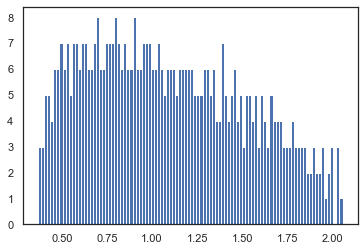

0.991869918699187
0.0008461312443356337


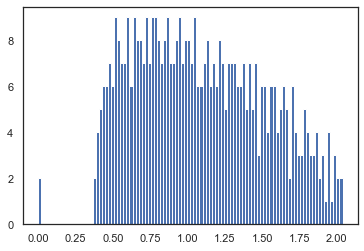

21.1880477639604


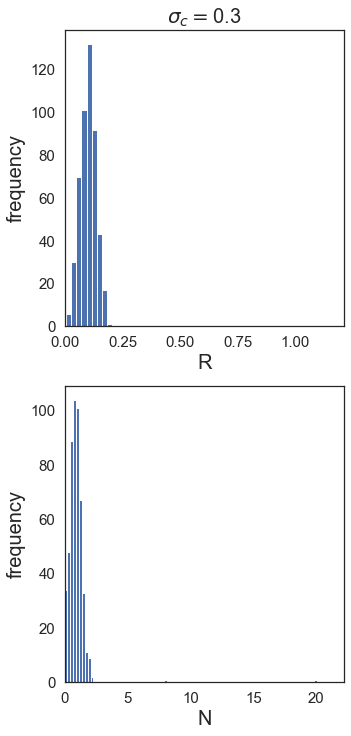

In [119]:
from numpy import linalg as LA
A_type='gaussian'
B_type='identity'
mu=0.0
sigc=0.3
k=1.0
filename='Abundance_data_500/Clam_org_'+A_type +'_'+B_type+'_sigc_'+str(sigc)+'_mu_'+str(mu)+'_k_'+str(k) +'.pkl'
Lams, C, C_del= pickle.load( open( filename, "rb" ) )

filename='Abundance_data_500/CRN_org_'+A_type +'_'+B_type+'_sigc_'+str(sigc)+'_mu_'+str(mu)+'_k_'+str(k) +'.pkl'
R_del, N_del= pickle.load( open( filename, "rb" ) )

i=3
C1=C[i]
ls=np.real(LA.eigvals(np.dot(C1,C1.transpose())));
print(np.amin(ls))
plt.hist(ls,100)
plt.show()

C1=C_del[i]
ls=np.real(LA.eigvals(np.dot(C1,C1.transpose())))
print(C1.shape[0]/C1.shape[1])
print(np.amin(ls))
plt.hist(ls,100)
plt.show()

n_bins=100
fig, [ax1,ax2] = plt.subplots(2,1,figsize=(5,12))
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
# We can set the number of bins with the `bins` kwarg
ax1.hist(R_del[i],bins =np.linspace(np.amin(R_del)-1,np.amax(R_del)+1, n_bins))
ax1.set_title("$\sigma_c=$"+str(sigc),fontsize=20)
#ax1.set_xscale("log")
ax1.set_xlabel('R',fontsize=20)
ax1.set_ylabel('frequency',fontsize=20)
ax1.set_xlim([0,np.amax(R_del)+1])

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.hist(N_del[i],bins =np.linspace(np.amin(N_del)-1,np.amax(N_del)+1, n_bins))
#ax2.set_xscale("log")
ax2.set_xlabel('N',fontsize=20)
ax2.set_ylabel('frequency',fontsize=20)
ax2.set_xlim([0,np.amax(N_del)+1])
print(np.amax(N_del))
plt.show()
fig.tight_layout()



In [111]:
np.linspace(np.amin(R_del)-1,np.amax(R_del)+1, n_bins)

array([-1.        , -0.97700995, -0.9540199 , -0.93102985, -0.9080398 ,
       -0.88504974, -0.86205969, -0.83906964, -0.81607959, -0.79308954,
       -0.77009949, -0.74710944, -0.72411939, -0.70112933, -0.67813928,
       -0.65514923, -0.63215918, -0.60916913, -0.58617908, -0.56318903,
       -0.54019898, -0.51720893, -0.49421887, -0.47122882, -0.44823877,
       -0.42524872, -0.40225867, -0.37926862, -0.35627857, -0.33328852,
       -0.31029846, -0.28730841, -0.26431836, -0.24132831, -0.21833826,
       -0.19534821, -0.17235816, -0.14936811, -0.12637806, -0.103388  ,
       -0.08039795, -0.0574079 , -0.03441785, -0.0114278 ,  0.01156225,
        0.0345523 ,  0.05754235,  0.08053241,  0.10352246,  0.12651251,
        0.14950256,  0.17249261,  0.19548266,  0.21847271,  0.24146276,
        0.26445282,  0.28744287,  0.31043292,  0.33342297,  0.35641302,
        0.37940307,  0.40239312,  0.42538317,  0.44837322,  0.47136328,
        0.49435333,  0.51734338,  0.54033343,  0.56332348,  0.58

(197,) (197, 197)


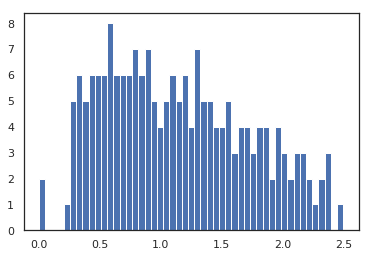

In [54]:
from numpy import linalg as LA
C1=C_cor[1]
ls=np.real(LA.eigvals(np.dot(C1,C1.transpose())))
print(ls.shape,C1.shape)
plt.hist(ls,bins = np.linspace(0,2.5,n_bins))
plt.show()

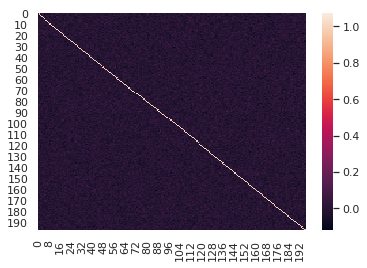

In [48]:
sns.heatmap(C_cor[1])
plt.show()

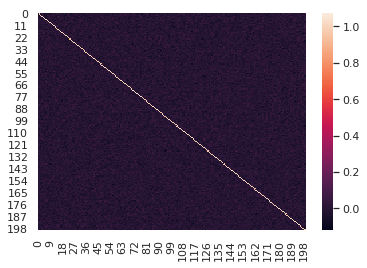

In [47]:
sns.heatmap(C[1])
plt.show()